In [25]:
import nltk
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [60]:
df = pd.read_csv('..\csv\\filenameinfo.csv')
df.head()

,id,sex,age,topic,sign,filename
0,1000331,female,37,indUnk,Leo,..\Data\1000331.female.37.indUnk.Leo.xml
1,1000866,female,17,Student,Libra,..\Data\1000866.female.17.Student.Libra.xml
2,1004904,male,23,Arts,Capricorn,..\Data\1004904.male.23.Arts.Capricorn.xml
3,1005076,female,25,Arts,Cancer,..\Data\1005076.female.25.Arts.Cancer.xml
4,1005545,male,25,Engineering,Sagittarius,..\Data\1005545.male.25.Engineering.Sagittariu...


In [61]:
def ageGroup(x) :
    if int(x) < 20 :
        return 'Teen'
    elif int(x) > 29 :
        return "30+"
    else :
        return "20s"

In [62]:
df['age_group'] = df.apply(lambda row: ageGroup(row['age']), axis=1)
df.head()

,id,sex,age,topic,sign,filename,age_group
0,1000331,female,37,indUnk,Leo,..\Data\1000331.female.37.indUnk.Leo.xml,30+
1,1000866,female,17,Student,Libra,..\Data\1000866.female.17.Student.Libra.xml,Teen
2,1004904,male,23,Arts,Capricorn,..\Data\1004904.male.23.Arts.Capricorn.xml,20s
3,1005076,female,25,Arts,Cancer,..\Data\1005076.female.25.Arts.Cancer.xml,20s
4,1005545,male,25,Engineering,Sagittarius,..\Data\1005545.male.25.Engineering.Sagittariu...,20s


In [63]:
def sumRow(x):
    return x['20s'] + x['30+'] + x['Teen']

def getPercent(n,tot) :
    return n/tot

In [58]:
ages = pd.crosstab(df['topic'],df['age_group'])
ages.head()

age_group,20s,30+,Teen
topic,,,
Accounting,74,20,11
Advertising,108,32,5
Agriculture,13,7,16
Architecture,46,14,9
Arts,361,164,196


In [59]:
ages['Total'] = ages.apply(lambda row: sumRow(row), axis=1)
ages['20s'] = ages.apply(lambda row: getPercent(row['20s'],row['Total']), axis = 1)
ages['30+'] = ages.apply(lambda row: getPercent(row['30+'],row['Total']), axis = 1)
ages['Teen'] = ages.apply(lambda row: getPercent(row['Teen'],row['Total']), axis = 1)
ages.head()

age_group,20s,30+,Teen,Total
topic,,,,
Accounting,0.704762,0.190476,0.104762,105
Advertising,0.744828,0.220690,0.034483,145
Agriculture,0.361111,0.194444,0.444444,36
Architecture,0.666667,0.202899,0.130435,69
Arts,0.500693,0.227462,0.271845,721


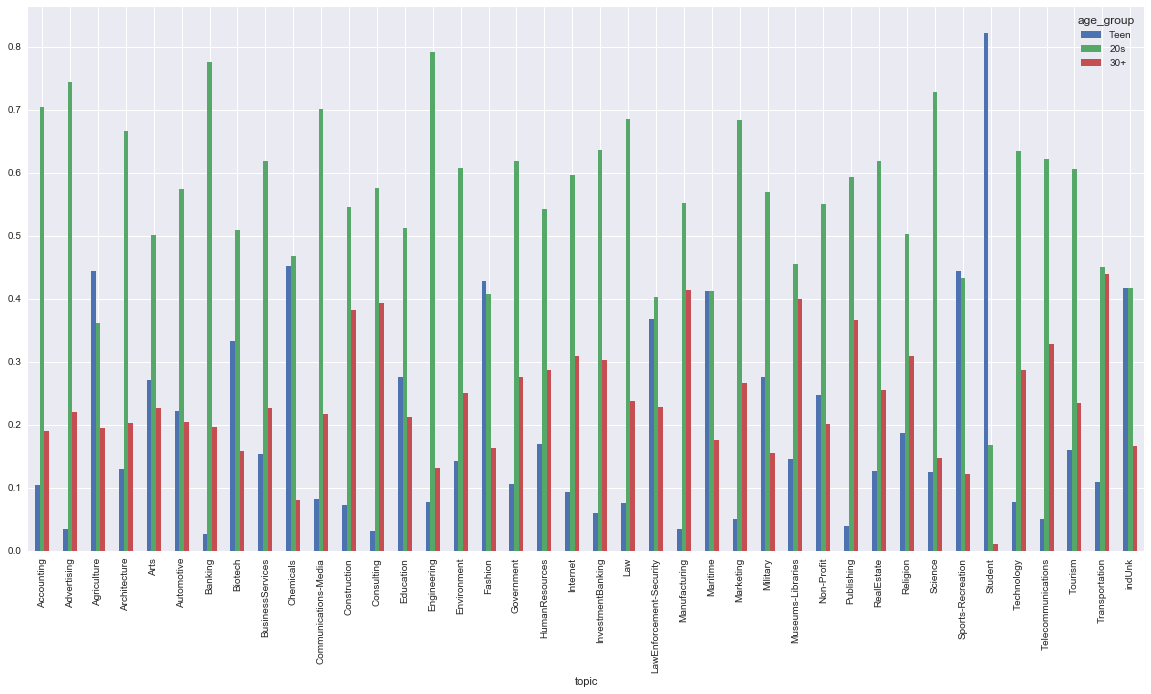

In [57]:
ages[['Teen','20s','30+']].plot(kind='bar',figsize=(20,10))
plt.show()